In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [5]:
# 특성 데이터 2차원으로 변경
from sklearn.model_selection import train_test_split

# 훈련 세타
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1,1)

#print(train_input, test_input)

In [9]:
# 최근접 이웃 개수 3

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

print(knr.predict([[50]]))

[1033.33333333]


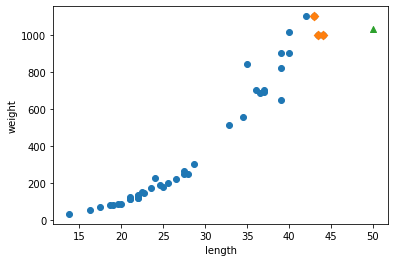

In [12]:
import matplotlib.pyplot as plt

# 50cm 농어 이웃 구하기
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes],train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
# 이웃 샘플 타깃의 평균 

print(np.mean(train_target[indexes]))

1033.3333333333333


In [18]:
# 길이가 100cm 예
print(knr.predict([[100]]))

[1033.33333333]


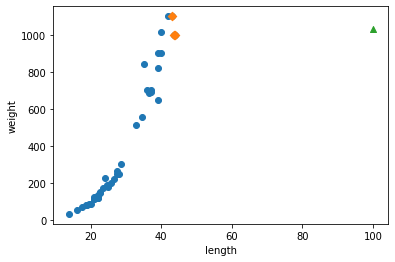

In [20]:
# 100cm 농어의 이웃 구하기

distances, indexes = knr.kneighbors([[100]])

# 훈련 세트 산점도
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그린다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [22]:
# 선형 회귀

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련한다.
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1246.43520864]


In [24]:
# 기울기와 절편 
# y = ax + b

print(lr.coef_, lr.intercept_) # 기울기, 절편


[39.22864307] -714.9969448508269


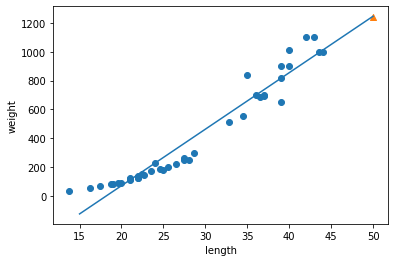

In [27]:
# 훈련 세트 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그린다.
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_]) # y = ax+b

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
# column_stack() 사용해 제곱

train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2,test_input))

print(train_poly.shape)
print(test_poly.shape) # 원래 특성인 길이를 제곱해 왼쪽 열에 추가해서 훈련 세트와 테스트 세트 모두 열이 2개로 늘어남


(42, 2)
(14, 2)


In [35]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,  50]]))  # 50cm 농어 무게 예측

[1576.53291723]


In [37]:
print(lr.coef_, lr.intercept_) 
# 무게 = 1.01 * 길이^2 - 21.2 * 길이 + 112

[  1.01056728 -21.2423442 ] 112.23193565519324


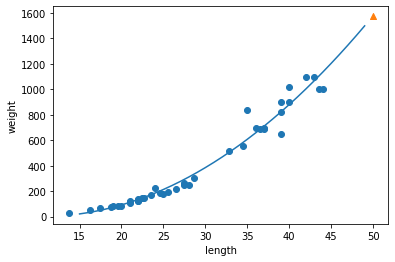

In [40]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다.
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그린다.
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그린다.
plt.plot(point, 1.01 * point**2 - 21.2*point + 112.23)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()



In [41]:
# 모델 평가

print(lr.score(train_poly, train_target))# 훈련
print(lr.score(test_poly, test_target)) # 테스트

0.9678960268023868
0.9863120037847304
